<a href="https://colab.research.google.com/github/Harris1010/climate_project/blob/main/Climate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Global_temp = pd.read_csv("/content/GlobalLandTemperaturesByCountry.csv")

In [ ]:
Global_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
##Removing the duplicated countries and countries for which no data

Global_temp = Global_temp[~Global_temp["Country"].isin(['Africa','Antarctica','Asia','Denmark (Europe)','Europe','France (Europe)',
                              'Netherlands (Europe)','North America','Oceania','Reunion','South America','United Kingdom (Europe)'])]


In [ ]:
#checking for null values

Global_temp.isnull().sum()

dt                                   0
AverageTemperature               29943
AverageTemperatureUncertainty    29943
Country                              0
dtype: int64

In [ ]:
# dropping all null values

Global_temp = Global_temp.dropna(how="any", axis=0)

In [ ]:
Global_temp.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [ ]:
Global_temp.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [ ]:
Global_temp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [ ]:
Global_temp.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,516675.000000,516675.000000
mean,17.490867,1.013298
std,10.956960,1.177877
min,-37.658000,0.052000
25%,10.553000,0.329000
50%,21.460000,0.576000
75%,25.937000,1.202000
max,38.842000,13.954000


In [ ]:
#Rename column df to Date

Global_temp.rename(columns={'dt' : 'Date'},inplace=True)

In [ ]:
#Filered Data Set - State

final_global_temp = Global_temp['Date'] > "1950-01-01"
Global_temp[final_global_temp]

Global_temp = Global_temp[final_global_temp]


In [ ]:
# converting dt to datatime datatype

Global_temp['Date'] = pd.to_datetime(Global_temp['Date'])
Global_temp.set_index('Date',inplace = True)
Global_temp.index

DatetimeIndex(['1950-02-01', '1950-03-01', '1950-04-01', '1950-05-01',
               '1950-06-01', '1950-07-01', '1950-08-01', '1950-09-01',
               '1950-10-01', '1950-11-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=176273, freq=None)

In [ ]:
Global_temp.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,
1950-02-01,-1.804,0.305,Åland
1950-03-01,0.090,0.439,Åland
1950-04-01,3.630,0.342,Åland
1950-05-01,8.106,0.239,Åland
1950-06-01,12.783,0.235,Åland


In [ ]:
Global_temp.tail()

,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,
2013-04-01,21.142,0.495,Zimbabwe
2013-05-01,19.059,1.022,Zimbabwe
2013-06-01,17.613,0.473,Zimbabwe
2013-07-01,17.000,0.453,Zimbabwe
2013-08-01,19.759,0.717,Zimbabwe


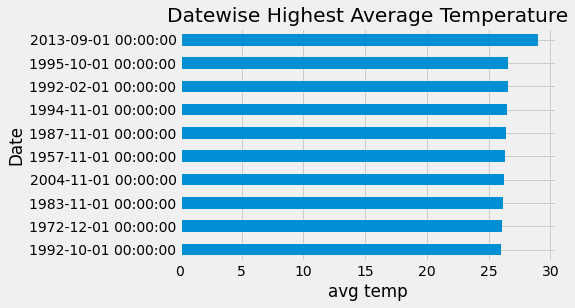

In [ ]:
ax = Global_temp.groupby(['Date'])['AverageTemperature'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("avg temp");
plt.title("Datewise Highest Average Temperature")
plt.style.use("fivethirtyeight")

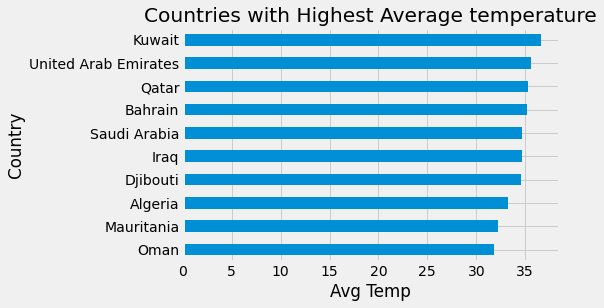

In [ ]:
ax = Global_temp.groupby(['Country'])['AverageTemperature'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Avg Temp");
plt.title("Countries with Highest Average temperature")
plt.style.use("fivethirtyeight")


In [ ]:
#Data Frame of Average Temperature vs Date

Global_temp_1 = Global_temp[['AverageTemperature']].resample('A').mean()
Global_temp_1.head()

,AverageTemperature
Date,
1950-12-31,19.320316
1951-12-31,19.039175
1952-12-31,19.075609
1953-12-31,19.107921
1954-12-31,18.842227


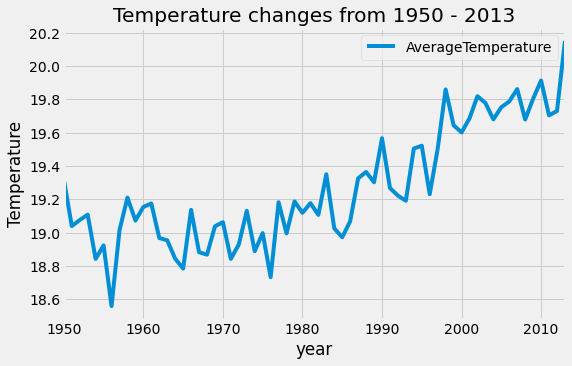

In [ ]:
Global_temp_1.plot(title='Temperature changes from 1950 - 2013',figsize=(8,5))
plt.ylabel('Temperature')
plt.xlabel('year')
plt.style.use("fivethirtyeight")

plt.show()


In [ ]:
#Average temperature for each country

countries = np.unique(Global_temp['Country'])
avg_temp_list = []
for country in countries:
    avg_temp_list.append(Global_temp[Global_temp['Country'] == country]['AverageTemperature'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


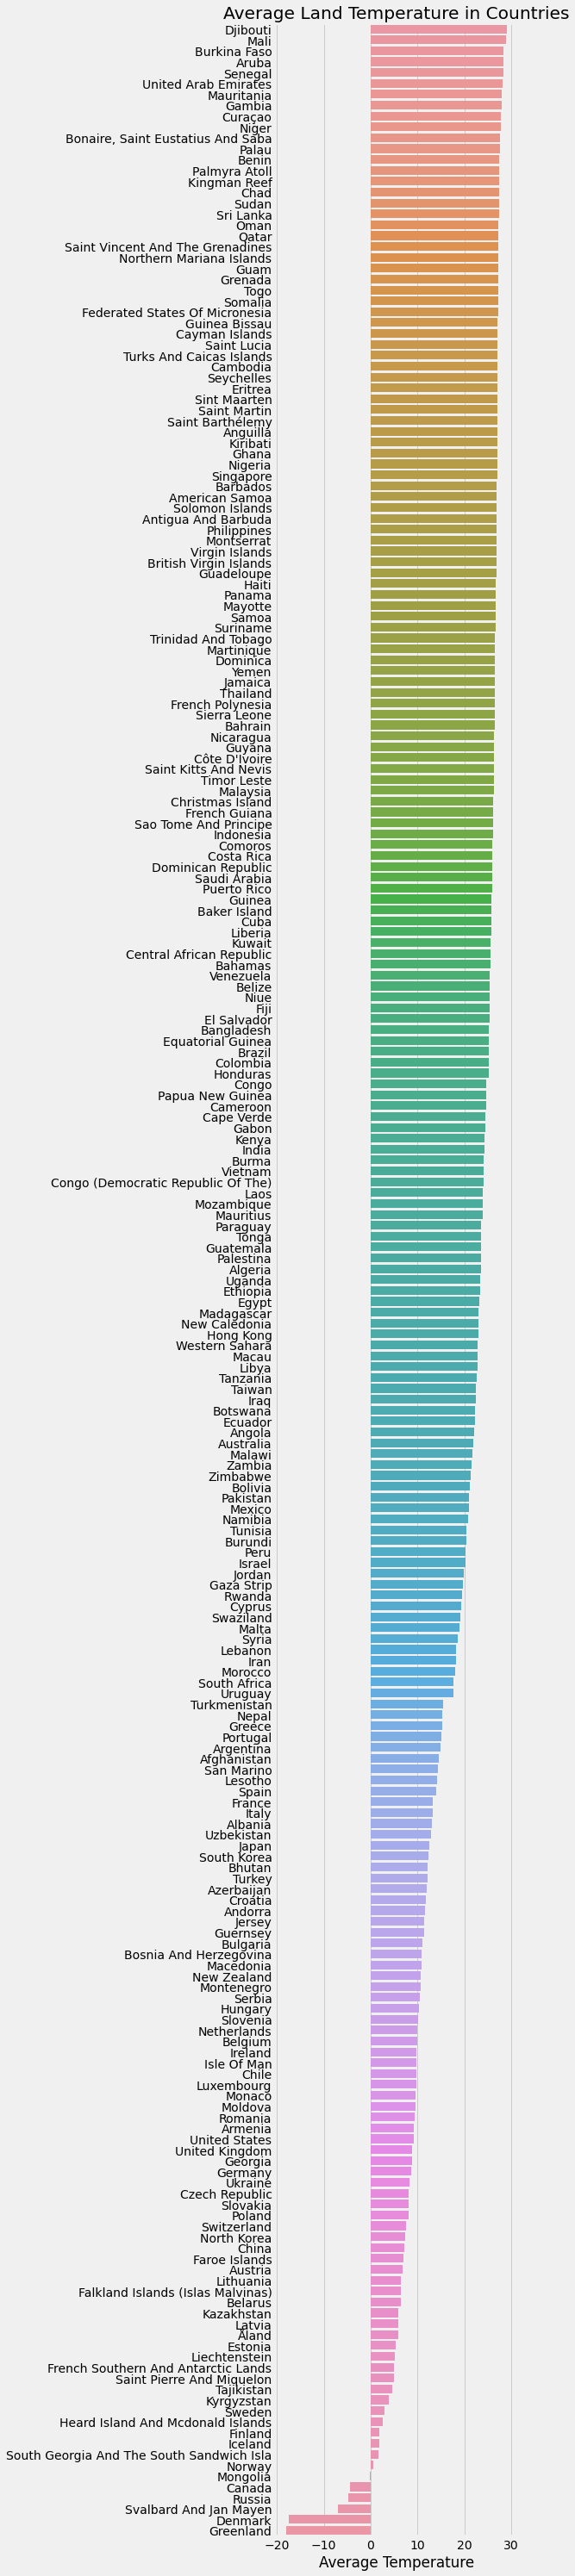

In [ ]:
# Visualizing Average Temperature Differences of Countries

avg_temp, countries_temp = (list(x) for x in zip(*sorted(zip(avg_temp_list, countries), reverse = True))) 
plt.subplots(figsize=(4.5, 50))
sns.color_palette('coolwarm', len(countries))
sns.barplot(avg_temp, countries_temp)

plt.xlabel("Average Temperature")
plt.title("Average Land Temperature in Countries")

plt.show()